<img src="https://raw.githubusercontent.com/instill-ai/cookbook/main/images/Logo.png" alt="Instill Logo" width="300"/>

# Tailor My Resume

TailorMyResume is a powerful tool designed to help job seekers optimize their resumes based on specific job descriptions. Users can upload their resumes and job descriptions in PDF format, and the app provides actionable feedback to enhance alignment with the desired role.

### Key Features:

- PDF to Text Conversion: Utilizes TASK\_CONVERT\_TO\_TEXT to extract text content from uploaded resume PDF files.
- Text Cleaning: Powered by OpenAI's gpt-4o model for cleaning and standardizing the resume text.
- Skill Matching: Compares the cleaned resume against the provided job description, identifying key skills and areas for improvement.
- Resume Evaluation: Provides a detailed evaluation report, including a suitability score (0-100) and feedback on strengths and areas for improvement based on the job description.

### Inputs
- Resume PDF File: Upload the candidate's resume in PDF format.
- Job Description: Paste the job description for comparison and evaluation.

### Outputs:
- Rate - Score from 0 to 100 indicating the suitability of the resume for the job description.
- Skill Matching: Key skills matched between the resume and job description.
- Resume Evaluation: Comprehensive feedback with a suitability score and suggestions for improvement.

## Step-by-Step Jupyter Notebook Setup:

**01. Install Required Libraries**

First, ensure that you have all the necessary libraries installed. You can run the following cell in your notebook:

In [14]:
!pip install requests
!pip install python-dotenv
!pip install matplotlib

**02. Setting Up Environment Variables** 

Since you need to set the INSTILL_API_TOKEN, you can create a .env file to store the API key securely, and then load it in the notebook.

Example .env file:
```plaintext
INSTILL_API_TOKEN=********
```

In [15]:
import base64
import json
import requests
# Load environment variables from .env file
from dotenv import load_dotenv
import os

# Ensure the .env file is in the same directory as this notebook
load_dotenv()

INSTILL_API_TOKEN = os.getenv("INSTILL_API_TOKEN")

**03. Define Helper Functions to Interact with the API**

You can write helper functions that will handle the file upload and API interaction. Here's an example:

In [16]:
def submit_resume_to_api(resume_file_path, job_description):
    # API endpoint
    url = "https://api.instill.tech/v1beta/users/manulthanura/pipelines/tailormyresume/trigger"

    # Headers for authorization
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {INSTILL_API_TOKEN}"
    }

    # Load the resume file content and encode it as base64
    with open(resume_file_path, 'rb') as file:
        resume_content = base64.b64encode(file.read()).decode('utf-8')

    # Payload to send to the API
    data = {
        "inputs": [
            {
                "job_description": job_description,
                "resume_pdf_file": resume_content
            }
        ]
    }

    # Sending the POST request to the API
    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None


**04. Run a Test Submission**

Now you can create a test cell in your notebook that will upload a resume file and display the results.

In [17]:
resume_path = "../data/resume.pdf"  # Update with your actual resume file path
job_description = '''
At [Company X], customer experience is at the forefront of everything we do. To help us build functional systems that improve the customer experience, we’re looking for a DevOps engineer who can be responsible for deploying product updates, identifying production issues, and implementing integrations that meet our customers’ needs. The ideal candidate will have a solid background in software engineering and be familiar with Ruby or Python, and will work with developers and engineers to ensure that software development follows established processes and works as intended. The DevOps engineer will also help plan projects and be involved in project management decisions.

Objectives of this role
Building and implementing new development tools and infrastructure
Understanding the needs of stakeholders and conveying them to developers
Working on ways to automate and improve development and release processes
Testing and examining code written by others and analyzing results
Ensuring that systems are safe and secure against cybersecurity threats
Identifying technical problems and developing software updates and fixes
Working with software developers and software engineers to ensure that development follows established processes and works as intended
Planning projects and being involved in project management decisions
Responsibilities
Deploy updates and fixes, and provide Level 2 technical support
Build tools to reduce occurrence of errors and improve customer experience
Develop software to integrate with internal back-end systems
Perform root cause analysis of production errors and resolve technical issues
Develop scripts to automate visualization
Design procedures for system troubleshooting and maintenance
Required skills and qualifications
Experience as a DevOps engineer or in a similar software engineering role
Proficiency with Git and GitHub workflows
Good knowledge of Ruby or Python
Working knowledge of databases and SQL
Problem-solving attitude
Collaborative team spirit
Preferred skills and qualifications
Bachelor of science degree (or equivalent) in computer science, engineering, or relevant field
Experience in civil engineering or customer experience
Experience in developing/engineering applications for a large company
'''

# Submit the resume and job description to the API
result = submit_resume_to_api(resume_path, job_description)

# Check the response
if result:
    print(result)

{'outputs': [{'resume_evaluation': '{\n  "Resume Rating": 85,\n  "Total Skills": 7,\n  "Experience": 1,\n  "Rejection Probability": 15,\n  "Areas Meeting Requirements": [\n    "The candidate has a bachelor\'s degree in computer science, which meets the educational requirement. They have relevant experience as a DevOps Engineer, where they created workflows for source code management, developed CI/CD methodologies, and designed disaster recovery solutions. The candidate is proficient in Python, which aligns with the job\'s requirement for knowledge of Ruby or Python. Additionally, they have experience in automation and improving development processes."\n  ],\n  "Areas for Improvement": [\n    "The candidate lacks specific experience with Ruby, Git, and GitHub workflows, which are preferred skills in the job description. They also have limited experience (1 year) in a DevOps role, which may not fully meet the expectations for a more seasoned candidate. Gaining experience in project manag

**05. Display the Results**

Assuming the API response is in JSON format, you can extract and display the relevant data, such as areas meeting requirements and areas for improvement.

In [18]:
# Assuming the API response contains the 'resume_evaluation' as a string
resume_evaluation_str = result['outputs'][0]['resume_evaluation']

# Convert the string to a dictionary
evaluation = json.loads(resume_evaluation_str)

# Now you can safely use .get() to extract data
areas_meeting_requirements = evaluation.get("Areas Meeting Requirements", [])
areas_for_improvement = evaluation.get("Areas for Improvement", [])

# Print results
print("\nAreas Meeting Requirements:")
for area in areas_meeting_requirements:
    print(area)

print("\nAreas for Improvement:")
for area in areas_for_improvement:
    print(area)


Areas Meeting Requirements:
The candidate has a bachelor's degree in computer science, which meets the educational requirement. They have relevant experience as a DevOps Engineer, where they created workflows for source code management, developed CI/CD methodologies, and designed disaster recovery solutions. The candidate is proficient in Python, which aligns with the job's requirement for knowledge of Ruby or Python. Additionally, they have experience in automation and improving development processes.

Areas for Improvement:
The candidate lacks specific experience with Ruby, Git, and GitHub workflows, which are preferred skills in the job description. They also have limited experience (1 year) in a DevOps role, which may not fully meet the expectations for a more seasoned candidate. Gaining experience in project management and collaborating with software developers on larger projects could enhance their profile.


**06. Add Cells for Visualization**

If you want to visualize some of the metrics like "Resume Rating" or "Rejection Probability," you can use libraries like matplotlib or seaborn:

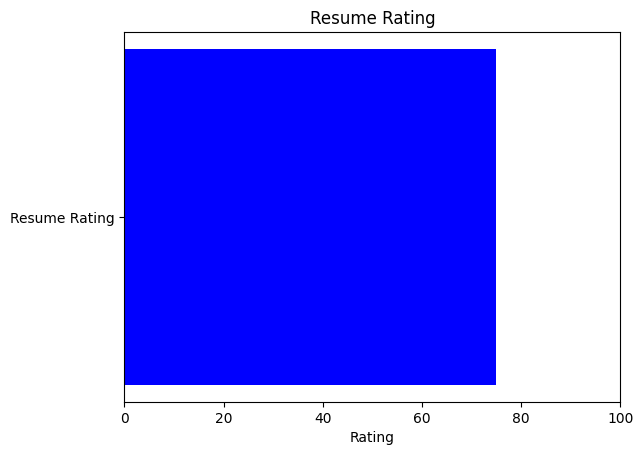


Areas Meeting Requirements:
- The candidate has a strong foundation in programming languages such as Python, Java, and PHP, which are essential for DevOps roles.

Areas for Improvement:
- Further exposure to continuous integration and continuous deployment (CI/CD) processes would enhance their profile.


In [19]:
import matplotlib.pyplot as plt

# Function to plot the resume rating
def plot_resume_rating(rating):
    fig, ax = plt.subplots()
    ax.barh(["Resume Rating"], [rating], color="blue")
    ax.set_xlim(0, 100)
    ax.set_xlabel("Rating")
    ax.set_title("Resume Rating")
    plt.show()

# Simulate getting the API result (you can replace this with the actual API response handling)
result = {
    'outputs': [{'resume_evaluation': '{\n  "Resume Rating": 75,\n  "Total Skills": 15,\n  "Experience": 1,\n  "Rejection Probability": 25,\n  "Areas Meeting Requirements": ["The candidate has a strong foundation in programming languages such as Python, Java, and PHP, which are essential for DevOps roles."],\n  "Areas for Improvement": ["Further exposure to continuous integration and continuous deployment (CI/CD) processes would enhance their profile."]\n}'}]
}

# Check if result is valid
if result:
    # Parse the JSON string into a dictionary
    evaluation = json.loads(result['outputs'][0]['resume_evaluation'])

    # Now you can access the fields in the dictionary
    resume_rating = evaluation.get("Resume Rating", 0)
    plot_resume_rating(resume_rating)
    
    areas_meeting_requirements = evaluation.get("Areas Meeting Requirements", [])
    areas_for_improvement = evaluation.get("Areas for Improvement", [])
    
    # Display the results
    print("\nAreas Meeting Requirements:")
    for area in areas_meeting_requirements:
        print(f"- {area}")
    
    print("\nAreas for Improvement:")
    for area in areas_for_improvement:
        print(f"- {area}")


# Thank You

I hope you find this guide helpful. Please try out the [TailorMyResume](https://github.com/manulthanura/TailorMyResume) pipeline and let me know your feedback. Don't forget to check out the [Instill AI](https://www.instill.tech/) make your AI journey more exciting.